### Import libs

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

from pyramid.arima import auto_arima

### Read data

In [2]:
df = pd.read_csv("data-wrss9.csv", parse_dates=["Date"], index_col=0)

### Rename columns

In [3]:
df.columns

Index(['Total confirmed cases', 'Total deaths', 'Total recovered'], dtype='object')

In [4]:
df.rename(columns={'Total confirmed cases':'TotalConfirmedCases',
                   'Total deaths':'TotalDeaths',
                   'Total recovered':'TotalRecovered'
                  }, inplace=True)

### Data Analysis

In [5]:
df.head()

,TotalConfirmedCases,TotalDeaths,TotalRecovered
Date,,,
Jan 23,555,0,0
Jan 24,653,18,30
Jan 25,941,26,36
Jan 26,2019,56,49
Jan 27,2794,80,54


In [6]:
df.tail()

,TotalConfirmedCases,TotalDeaths,TotalRecovered
Date,,,
Mar 31,802726,39051,177866
Apr 1,873563,43451,186827
Apr 2,941202,47631,198075
Apr 3,1029516,54153,219868
Apr 4,1139112,61144,236203


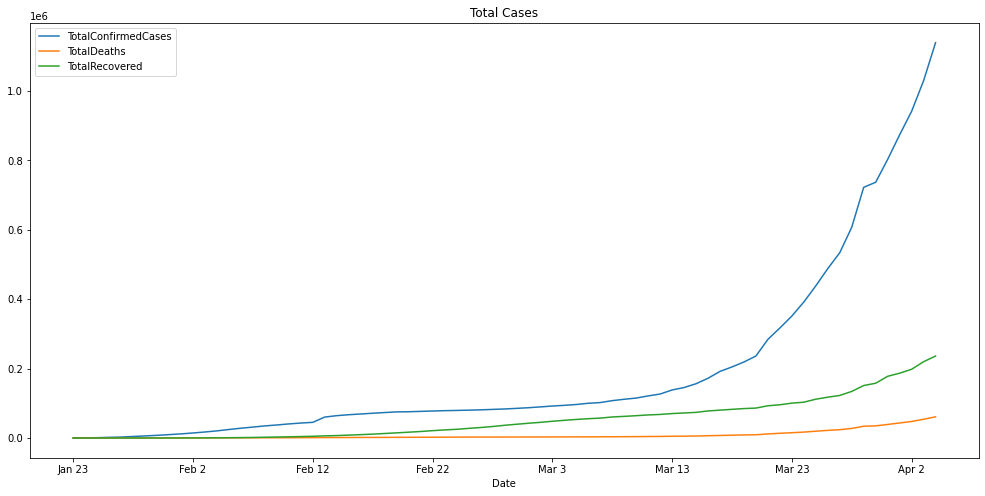

In [7]:
df.TotalConfirmedCases.plot(title="Total Cases", figsize=(17, 8), legend=True)
df.TotalDeaths.plot(figsize=(17, 8), legend=True)
df.TotalRecovered.plot(figsize=(17, 8), legend=True)

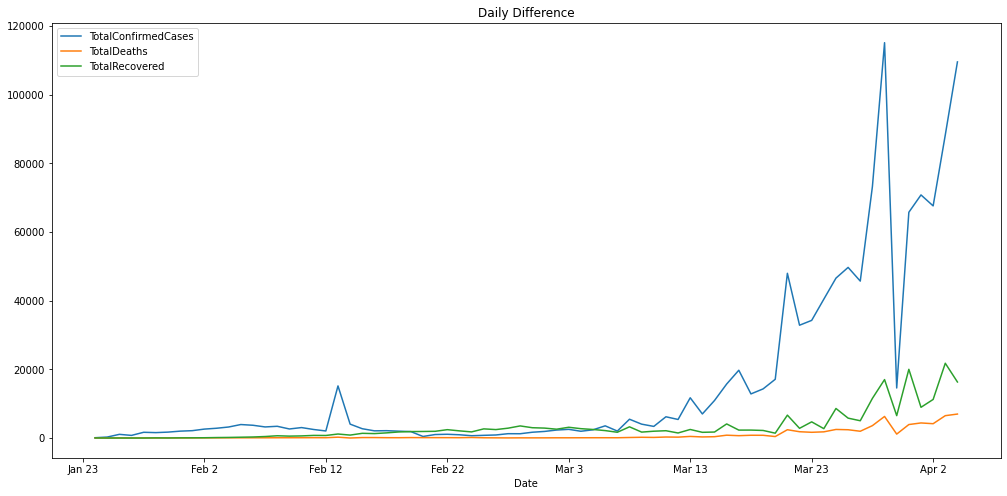

In [8]:
(df.TotalConfirmedCases - df.TotalConfirmedCases.shift(1)).plot(title="Daily Difference", figsize=(17, 8), legend=True)
(df.TotalDeaths - df.TotalDeaths.shift(1)).plot(figsize=(17, 8), legend=True)
(df.TotalRecovered - df.TotalRecovered.shift(1)).plot(figsize=(17, 8), legend=True)

### Constants for predictions

In [9]:
predicted_days = 5
firstPredictionDay = datetime.datetime.strptime(df.index[-1] + ' 2020','%b %d %Y') + datetime.timedelta(days = 1)

### Arima for confirmed cases

In [10]:
confirmed_model = auto_arima(df.TotalConfirmedCases,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=1552.438, BIC=1566.014, Fit time=1.458 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1578.610, BIC=1583.135, Fit time=0.021 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1562.545, BIC=1569.333, Fit time=0.536 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1551.247, BIC=1558.035, Fit time=0.834 seconds
Fit ARIMA: order=(1, 2, 1); AIC=1552.030, BIC=1561.081, Fit time=0.734 seconds
Fit ARIMA: order=(0, 2, 2); AIC=1550.823, BIC=1559.874, Fit time=0.874 seconds
Fit ARIMA: order=(1, 2, 3); AIC=1539.052, BIC=1552.628, Fit time=5.073 seconds
Fit ARIMA: order=(0, 2, 3); AIC=1540.692, BIC=1552.005, Fit time=2.511 seconds
Fit ARIMA: order=(2, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 2); AIC=1541.684, BIC=1552.998, Fit time=4.655 seconds
Fit ARIMA: order=(1, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 4); AIC=1537.627, BIC=1555.728, Fit time=5.703 seconds
Fit ARIMA: order=(3, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA

In [11]:
confirmed_model.aic()

1537.6268623486455

In [12]:
confirmed_model.fit(df.TotalConfirmedCases)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 2, 4),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [13]:
new_cases_forecast = confirmed_model.predict(n_periods=predicted_days)

In [14]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(new_cases_forecast[x])))

2020-04-05 - 1188318
2020-04-06 - 1261790
2020-04-07 - 1334311
2020-04-08 - 1434541
2020-04-09 - 1505574


### Arima for death cases

In [15]:
deaths_model = auto_arima(df.TotalDeaths,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=1145.173, BIC=1158.749, Fit time=1.133 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1168.159, BIC=1172.684, Fit time=0.017 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1153.537, BIC=1160.325, Fit time=0.211 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1146.524, BIC=1153.312, Fit time=0.247 seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 2, 2); AIC=1124.371, BIC=1140.210, Fit time=1.907 seconds
Fit ARIMA: order=(3, 2, 1); AIC=1148.899, BIC=1162.475, Fit time=1.452 seconds
Fit ARIMA: order=(3, 2, 3); AIC=1125.968, BIC=1144.070, Fit time=3.456 seconds
Fit ARIMA: order=(2, 2, 1); AIC=1143.213, BIC=1154.527, Fit time=0.687 seconds
Fit ARIMA: order=(4, 2, 3); AIC=1166.601, BIC=1186.965, Fit time=2.994 seconds
Fit ARIMA: order=(4, 2, 2); AIC=1168.421, BIC=1186.522, Fit time=6.991 seconds
Total fit time: 19.200 seconds


In [16]:
deaths_model.aic()

1124.3714012179453

In [17]:
deaths_model.fit(df.TotalDeaths)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [18]:
death_forecast = deaths_model.predict(n_periods=predicted_days)

In [19]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(death_forecast[x])))

2020-04-05 - 66199
2020-04-06 - 72302
2020-04-07 - 79482
2020-04-08 - 86768
2020-04-09 - 94382


### Arima for recovered cases

In [20]:
recovered_model = auto_arima(df.TotalRecovered,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=1303.172, BIC=1316.748, Fit time=1.049 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1353.130, BIC=1357.655, Fit time=0.016 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1320.676, BIC=1327.464, Fit time=0.293 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1316.059, BIC=1322.847, Fit time=0.307 seconds
Fit ARIMA: order=(1, 2, 2); AIC=1295.577, BIC=1306.891, Fit time=0.845 seconds
Fit ARIMA: order=(1, 2, 1); AIC=1309.878, BIC=1318.929, Fit time=0.707 seconds
Fit ARIMA: order=(1, 2, 3); AIC=1297.139, BIC=1310.715, Fit time=1.436 seconds
Fit ARIMA: order=(2, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 2); AIC=1300.784, BIC=1309.835, Fit time=0.520 seconds
Total fit time: 5.705 seconds


In [21]:
recovered_model.aic()

1295.5774845537358

In [22]:
recovered_model.fit(df.TotalRecovered)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [23]:
recovered_forecast = recovered_model.predict(n_periods=predicted_days)

In [24]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(recovered_forecast[x])))

2020-04-05 - 253346
2020-04-06 - 270435
2020-04-07 - 287587
2020-04-08 - 304869
2020-04-09 - 322319
